In [800]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import sklearn.svm

In [801]:
df = pd.read_csv("train.csv")
df.shape

(891, 12)

In [802]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [803]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [804]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since the Cabin column has large amount of the data missing, it is eliminated.

In [805]:
col =["PassengerId","Cabin","Name","Ticket"]
df = df.drop(columns = col)

In [806]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna("S")

In [807]:
df.Sex.replace({'female':1,'male':2},inplace=True)

In [808]:
df.Embarked.replace({'S':1,'C':2,'Q':3},inplace=True)

In [809]:
df.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,2,22.000000,1,0,7.2500,1
1,1,1,1,38.000000,1,0,71.2833,2
2,1,3,1,26.000000,0,0,7.9250,1
3,1,1,1,35.000000,1,0,53.1000,1
4,0,3,2,35.000000,0,0,8.0500,1
5,0,3,2,29.699118,0,0,8.4583,3
6,0,1,2,54.000000,0,0,51.8625,1
7,0,3,2,2.000000,3,1,21.0750,1
8,1,3,1,27.000000,0,2,11.1333,1
9,1,2,1,14.000000,1,0,30.0708,2


<AxesSubplot:>

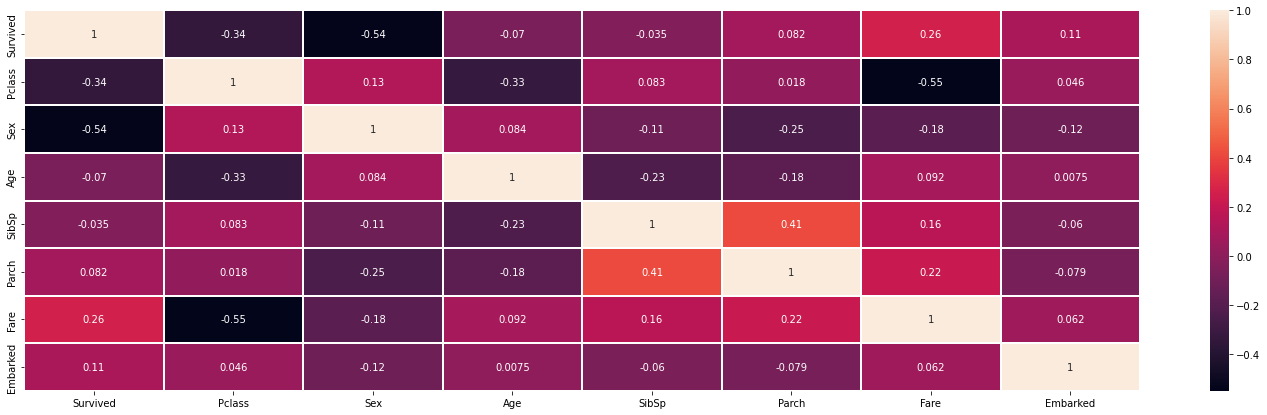

In [810]:
plt.figure(figsize=(25,7))
cor=df.corr()
sb.heatmap(cor,annot=True, linewidths=0.3)

In [811]:
y = df.Survived

In [812]:
X = df.drop(['Survived'],axis = 1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,2,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,2
2,3,1,26.000000,0,0,7.9250,1
3,1,1,35.000000,1,0,53.1000,1
4,3,2,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,2,27.000000,0,0,13.0000,1
887,1,1,19.000000,0,0,30.0000,1
888,3,1,29.699118,1,2,23.4500,1
889,1,2,26.000000,0,0,30.0000,2


In [813]:
import sklearn
import sklearn.linear_model

In [814]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.88)

In [815]:
from sklearn.preprocessing import StandardScaler
sclar=StandardScaler()
x_train=sclar.fit_transform(x_train)
x_test=sclar.fit_transform(x_test)

In [816]:
clf = sklearn.linear_model.LogisticRegression();
clf.fit(x_train, y_train);

In [817]:
LR_predictions = clf.predict(x_train)
print ('Accuracy of logistic regression: %d ' % float((np.dot(y_train,LR_predictions) + np.dot(1-y_train,1-LR_predictions))/float(y_train.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 80 % (percentage of correctly labelled datapoints)


In [818]:
LR_predictions = clf.predict(x_test)
print ('Accuracy of logistic regression: %d ' % float((np.dot(y_test,LR_predictions) + np.dot(1-y_test,1-LR_predictions))/float(y_test.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 78 % (percentage of correctly labelled datapoints)


# prediction for test data.

In [819]:
df_t = pd.read_csv("test.csv")
dft = df_t

In [820]:
df_t.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [821]:
df_t.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [822]:
coln =["PassengerId","Cabin","Name","Ticket"]
df_t = df_t.drop(columns = coln)

In [823]:
df_t['Age']=df_t['Age'].fillna(df_t['Age'].mean())
df_t['Embarked']=df_t['Embarked'].fillna("S")
df_t['Fare']=df_t['Fare'].fillna(df_t['Fare'].mean())

In [824]:
df_t.Sex.replace({'female':1,'male':2},inplace=True)

In [825]:
df_t.Embarked.replace({'S':1,'C':2,'Q':3},inplace=True)

In [826]:
df_t

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,2,34.50000,0,0,7.8292,3
1,3,1,47.00000,1,0,7.0000,1
2,2,2,62.00000,0,0,9.6875,3
3,3,2,27.00000,0,0,8.6625,1
4,3,1,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,2,30.27259,0,0,8.0500,1
414,1,1,39.00000,0,0,108.9000,2
415,3,2,38.50000,0,0,7.2500,1
416,3,2,30.27259,0,0,8.0500,1


In [827]:
x_traint=sclar.fit_transform(df_t)

In [828]:
df_t.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [829]:
LR_predictions = clf.predict(x_traint)

In [830]:
dft["Survived"] = LR_predictions

In [831]:
coln = ["PassengerId","Survived"]
data = dft[coln]

In [832]:
data.to_csv("resultLR.csv",index = False)

In [833]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=0.00201,hidden_layer_sizes=(7,1), random_state=1,max_iter = 20000)
clf.fit(x_train,y_train)

MLPClassifier(alpha=0.00201, hidden_layer_sizes=(7, 1), max_iter=20000,
              random_state=1, solver='lbfgs')

In [834]:
LR_predictions = clf.predict(x_train)
print ('Accuracy of logistic regression: %d ' % float((np.dot(y_train,LR_predictions) + np.dot(1-y_train,1-LR_predictions))/float(y_train.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 84 % (percentage of correctly labelled datapoints)


In [835]:
LR_predictions = clf.predict(x_test)
print ('Accuracy of logistic regression: %d ' % float((np.dot(y_test,LR_predictions) + np.dot(1-y_test,1-LR_predictions))/float(y_test.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 81 % (percentage of correctly labelled datapoints)


In [836]:
LR_predictions = clf.predict(x_traint)

In [837]:
dft["Survived"] = LR_predictions

In [838]:
coln = ["PassengerId","Survived"]
data = dft[coln]

In [839]:
data.to_csv("resultNN.csv",index = False)

In [840]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [841]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(x_test, y_test)))


Accuracy on training set: 0.954
Accuracy on test set: 0.766


In [842]:
LR_predictiont = forest.predict(x_traint)
dft["Survived"] = LR_predictiont
coln = ["PassengerId","Survived"]
data = dft[coln]
data.to_csv("resultRF.csv",index = False)

In [843]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(x_test, y_test)))


Accuracy on training set: 0.890
Accuracy on test set: 0.822


In [844]:
LR_predictiont = gbrt.predict(x_traint)
dft["Survived"] = LR_predictiont
coln = ["PassengerId","Survived"]
data = dft[coln]
data.to_csv("resultGB.csv",index = False)

In [845]:
from sklearn import svm
ksvm = svm.SVC(kernel = "rbf")
ksvm.fit(x_train,y_train)
print("Accuracy on training set: {:.3f}".format(ksvm.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ksvm.score(x_test, y_test)))

Accuracy on training set: 0.843
Accuracy on test set: 0.822


In [846]:
LR_predictiont = ksvm.predict(x_traint)
dft["Survived"] = LR_predictiont
coln = ["PassengerId","Survived"]
data = dft[coln]
data.to_csv("resultSVM.csv",index = False)